In [1]:
"""examples in using the network module"""

'examples in using the network module'

In [1]:
%load_ext autoreload
%autoreload 2

import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
### MNIST classification
# please place the dataset manually into data/ folder

# load
train = pd.read_csv("data/mnist_train.csv", header=None)
test = pd.read_csv("data/mnist_test.csv", header=None)

# preprocess X
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode y
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train

In [13]:
# define network
nn = network.NeuralNetwork([
                    network.Linear_layer(784, 200, bias=None),
                    network.Activation_layer('ReLU'),
    
                    network.Linear_layer(200, 10, bias=None),
                    network.Activation_layer('fast_softmax')
                    ])
param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-16, "epoch": 0, 't': 1, 'clip': 1.0,
         'optimizer': ('Adam', 0.9, 0.999), 'regularizer': ('l2', 1e-3), "loss_fn":"fast_cross_entropy"}

In [14]:
for i in range(5):

    nn.train(X, y, param, rand=True)
    yhat = nn.query(X_t)
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
    
    
gc.collect()

Average loss = 3.481588, elapsed time = 62.31.
Epoch 0, Performance = 96.6
Average loss = 1.422410, elapsed time = 50.82.
Epoch 1, Performance = 97.39
Average loss = 0.930521, elapsed time = 59.15.
Epoch 2, Performance = 97.59
Average loss = 0.631183, elapsed time = 59.46.
Epoch 3, Performance = 98.03
Average loss = 0.446230, elapsed time = 62.52.
Epoch 4, Performance = 97.89


175

In [15]:
nn.print_parameters()

--0--
Printing linear layer:
{'bias': None,
 'input': array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01]], dtype=float32),
 'input_nodes': 784,
 'm1': array([[-1.68802640e-05,  3.68025951e-05,  4.12881349e-06, ...,
        -1.30142103e-06, -1.46255933e-06, -2.62612332e-05],
       [-1.68802640e-05,  3.68025951e-05,  4.12881349e-06, ...,
        -1.30142103e-06, -1.46255933e-06, -2.62612332e-05],
       [-1.68802640e-05,  3.68025951e-05,  4.12881349e-06, ...,
        -1.30142103e-06, -1.46255933e-06, -2.62612332e-05],
       ...,
       [-1.68802640e-05,  3.68025951e-05,  4.12881349e-06, ...,
        -1.30142103e-06, -1.46255933e-06, -2.62612332e-05],
       [-1.68802640e-05,  3.68025951e-05,  4.12881349e-06, ...,
        -1.301421

In [23]:
### Regression

x1 = np.arange(1,100)
x2 = np.arange(1,100)+1
x3 = np.stack((x1,x2)).T

x4 = x1*x2/99+x1
x4 = np.expand_dims(x4,axis=1)

In [32]:
# Maxout layer is a good choice for regression tasks thanks to its high complexity
nn2 = network.NeuralNetwork([
                    network.Maxout_layer(2, 20),
                    network.Maxout_layer(20, 1)
                    ])

param = {"lr": 1e-3, 'batch': 16, "mode": "train", "eps": 1e-16, "epoch": 0, 't': 1, 'clip': 1.0,
         'optimizer': ('Adam', 0.9, 0.999), 'regularizer': None, "loss_fn":"mse"}

In [33]:
temp = nn2.layers[0].w1

In [34]:
for _ in range(1000):
    nn2.train(x3, x4, param)

Average loss = 3027.130236, elapsed time = 0.00.
Average loss = 1970.412639, elapsed time = 0.00.
Average loss = 1166.625977, elapsed time = 0.00.
Average loss = 599.418644, elapsed time = 0.00.
Average loss = 285.898624, elapsed time = 0.00.
Average loss = 168.637774, elapsed time = 0.00.
Average loss = 186.674245, elapsed time = 0.00.
Average loss = 198.666346, elapsed time = 0.00.
Average loss = 181.939770, elapsed time = 0.00.
Average loss = 167.994483, elapsed time = 0.00.
Average loss = 170.602853, elapsed time = 0.00.
Average loss = 171.688986, elapsed time = 0.00.
Average loss = 169.767294, elapsed time = 0.00.
Average loss = 168.906597, elapsed time = 0.00.
Average loss = 168.250400, elapsed time = 0.00.
Average loss = 168.026374, elapsed time = 0.00.
Average loss = 167.507914, elapsed time = 0.00.
Average loss = 167.750406, elapsed time = 0.00.
Average loss = 166.629903, elapsed time = 0.00.
Average loss = 166.901684, elapsed time = 0.00.
Average loss = 167.246519, elapsed ti

In [35]:
print(f"{param['epoch']} epoch trained, error:")

# errors
nn2(x3) - x4

1000 epoch trained, error:


array([[-1.09305073e+00],
       [-8.73620853e-01],
       [-6.74392997e-01],
       [-4.95367162e-01],
       [-3.36543347e-01],
       [-1.97921552e-01],
       [-7.95017778e-02],
       [ 1.87159766e-02],
       [ 9.67317108e-02],
       [ 1.54545425e-01],
       [ 1.92157119e-01],
       [ 2.09566792e-01],
       [ 2.06774446e-01],
       [ 1.83780079e-01],
       [ 1.40583692e-01],
       [ 7.71852847e-02],
       [ 2.06590454e-02],
       [-1.30282938e-02],
       [-2.96456878e-02],
       [-6.23770004e-02],
       [-8.63541157e-02],
       [-2.18422965e-02],
       [ 2.24675024e-02],
       [ 4.65752811e-02],
       [ 5.04810396e-02],
       [ 3.41847780e-02],
       [-2.31350391e-03],
       [-5.90138060e-02],
       [-1.35916128e-01],
       [-1.82631065e-01],
       [-9.64668176e-02],
       [-3.05045901e-02],
       [ 1.52556173e-02],
       [ 4.08138044e-02],
       [ 4.61699714e-02],
       [ 3.15985685e-02],
       [ 3.29710599e-02],
       [ 1.38268104e-02],
       [-2.5

In [36]:
# this is the total weight updates our 1st layer received

# Maxout also suffers from the dying ReLU problem,
# Zeros below represent dead nodes
temp - nn2.layers[0].w1

array([[-0.0402549 ,  0.        ,  0.04922191,  0.04578375,  0.04992245,
         0.        ,  0.        ,  0.02904275,  0.13114052,  0.05090145,
         0.02124348,  0.        ,  0.06956661,  0.05261142,  0.        ,
         0.21844042,  0.04604868,  0.        ,  0.05729199,  0.03310776],
       [-0.10581958,  0.        , -0.23803779,  0.12618837,  0.11196944,
         0.        ,  0.        ,  0.08930807, -0.36525338,  0.12242339,
         0.06931812,  0.        , -0.06230456,  0.107599  ,  0.        ,
        -0.13301537,  0.09862089,  0.        , -0.37163591,  0.11090893],
       [-3.09499239,  0.        , -1.93340459,  3.71292811,  2.90908676,
         0.        ,  0.        ,  2.94586318, -3.55057266,  3.34263192,
         2.15401051,  0.        , -0.8489735 ,  2.53625761,  0.        ,
        -2.50640479,  2.41209115,  0.        , -3.2272953 ,  3.80400816]])

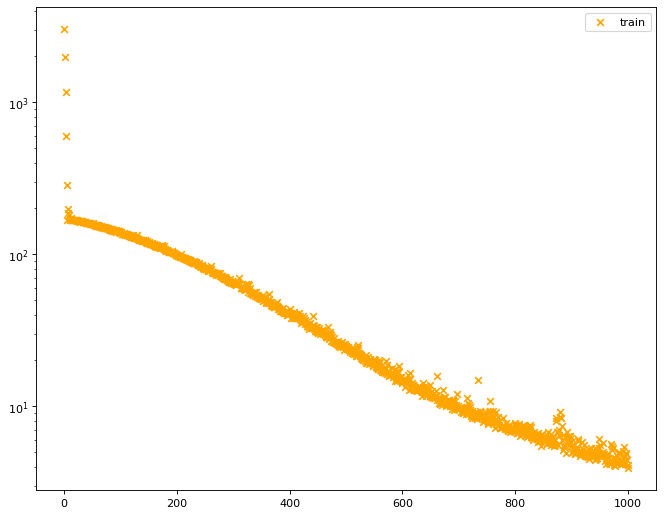

In [37]:
nn2.plot_loss()

In [38]:
# conv1d

In [39]:
X = np.arange(100).reshape(25, 1, 4)
y = np.sum(X, axis=2)

In [40]:
nn = network.NeuralNetwork([
                            network.Conv1d_layer(1, 4, 4, 2),
                            network.Activation_layer('ReLU'),
                            network.Conv1d_layer(4, 1, 3, 2),
                            network.Activation_layer('ReLU'),
                            network.Flatten_layer(),
                            network.Linear_layer(2, 1)
                            ])

param = {"lr": 3e-4, 'batch': 8, "mode": "train", "eps": 1e-16, "epoch": 0, 't': 1, 'clip': 1.0,
         'optimizer': ('Adam', 0.9, 0.999), 'regularizer': None, "loss_fn":"mse"}

In [41]:
nn.print_parameters()

--0--
Printing conv1d layer:
{'bias': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'db1': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'db2': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
 'ic': 1,
 'iw': 4,
 'kernels': array([[[ 0.02191782,  0.04286284]],

       [[ 1.56449266, -1.07711931]],

       [[-1.04835981,  1.13599704]],

       [[-0.49811395, -0.5623233 ]]]),
 'kw': 2,
 'm1': array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]]),
 'm2': array([[[0., 0.]],

       [[0., 0.]],

       [[0., 0.]],

       [[0., 0.]]]),
 'oc': 4,
 'ow': 3,
 'stride': 1,
 'type': 'conv1d'}
--1--
Printing activation layer:
{'func_backward': <function <lambda> at 0x00000163F9376310>,
 'func_forward': <function <lambda> at 0x00000163F9376280>,
 'func_name': 'relu',
 'type': 'activation'}
--2--
Printing conv1d layer:
{'bias': array([[0., 0.]]),
 'db1': 

In [43]:
for _ in range(1000):
    nn.train(X, y, param)

Average loss = 52151.509756, elapsed time = 0.01.
Average loss = 53110.619343, elapsed time = 0.01.
Average loss = 52487.163460, elapsed time = 0.01.
Average loss = 52799.807231, elapsed time = 0.01.
Average loss = 52950.594630, elapsed time = 0.01.
Average loss = 52375.128622, elapsed time = 0.01.
Average loss = 52014.776057, elapsed time = 0.01.
Average loss = 52034.677383, elapsed time = 0.01.
Average loss = 52358.851733, elapsed time = 0.01.
Average loss = 51978.414554, elapsed time = 0.01.
Average loss = 51612.754226, elapsed time = 0.01.
Average loss = 51784.371267, elapsed time = 0.01.
Average loss = 53054.612239, elapsed time = 0.01.
Average loss = 52906.778367, elapsed time = 0.01.
Average loss = 53120.941899, elapsed time = 0.01.
Average loss = 52915.040312, elapsed time = 0.01.
Average loss = 53106.959234, elapsed time = 0.01.
Average loss = 52011.106542, elapsed time = 0.01.
Average loss = 52173.883027, elapsed time = 0.01.
Average loss = 51550.008424, elapsed time = 0.01.


In [44]:
nn.print_parameters()

--0--
Printing conv1d layer:
{'bias': array([[-0.5605007 , -0.58123005, -0.58947655],
       [ 0.45199212,  0.48107306,  0.48865214],
       [-0.57353672, -0.57353672, -0.57353672],
       [ 0.        ,  0.        ,  0.        ]]),
 'db1': array([[ 0.44412039,  0.44412039,  0.50321111],
       [-0.20797628, -0.20797628, -0.20797628],
       [ 0.64451118,  0.64451118,  0.64451118],
       [ 0.        ,  0.        ,  0.        ]]),
 'db2': array([[0.22253843, 0.25013741, 0.26438549],
       [0.05210783, 0.05873989, 0.06070664],
       [0.4651166 , 0.4651166 , 0.4651166 ],
       [0.        , 0.        , 0.        ]]),
 'ic': 1,
 'inputs': array([[[20, 21, 22, 23]],

       [[88, 89, 90, 91]],

       [[68, 69, 70, 71]],

       [[ 0,  1,  2,  3]],

       [[56, 57, 58, 59]],

       [[12, 13, 14, 15]],

       [[52, 53, 54, 55]],

       [[84, 85, 86, 87]]]),
 'iw': 4,
 'kernels': array([[[ 0.17017072,  0.17029133]],

       [[ 1.42018829, -1.20677034]],

       [[-0.90246846,  1.2612325

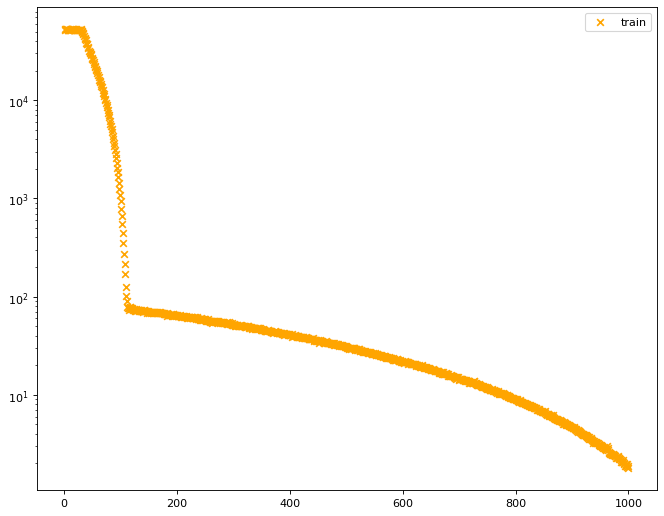

In [45]:
nn.plot_loss()